In [51]:
import pandas as pd
import json
import dateparser
%pylab inline
#print dateparser.parse(" 1200").date()

#load about_pages
#df=pd.read_csv('de/all_data_bias_labour_gender.csv',sep='\t', encoding='utf-8',index_col=0)#885
#Remove data where there is no male person neither female  simultaneously
#df=df[(df.male_person_amount>0)| (df.female_person_amount>0)]#257
#print "There are ",len(df),"profesions with at least one person"
#There are  257 profesions with at least one person

Populating the interactive namespace from numpy and matplotlib


In [21]:
df_m_w=pd.DataFrame.from_csv("de/people_with_birthDate.csv",encoding="utf8")

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text xticklabel objects>)

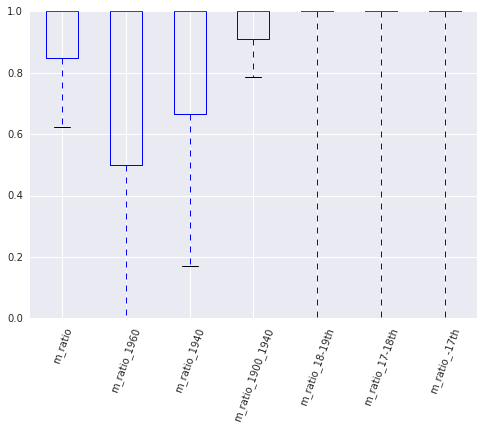

In [22]:
g=df_m_w.boxplot(column=["m_ratio","m_ratio_1960","m_ratio_1940","m_ratio_1900_1940","m_ratio_18-19th",
                         "m_ratio_17-18th","m_ratio_-17th"],
                 return_type="axes",showfliers=False)
plt.xticks(rotation=70)

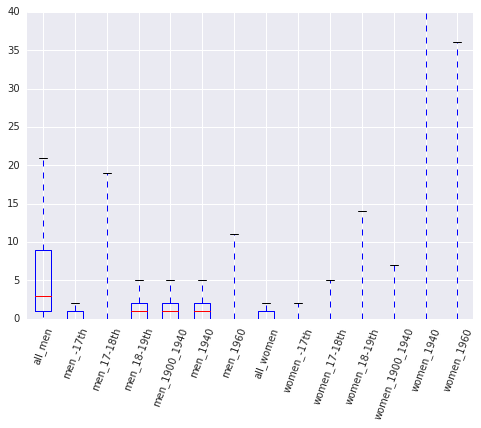

In [23]:
df_m_w.boxplot(column=list(df_m_w.columns[:14].values),return_type='axes',showfliers=False)
plt.xticks(rotation=70)
plt.ylim(0,40)
plt.show()

In [24]:
std_2=df_m_w.m_ratio.std()*2
mean_m=df_m_w.m_ratio.mean()
std_2_=df_m_w.m_ratio_1960.std()*2
mean_m_=df_m_w.m_ratio_1960.mean()
df1=df_m_w[ abs(df_m_w.m_ratio - mean_m)<std_2]["m_ratio"]
df2=df_m_w[ abs(df_m_w.m_ratio_1960 - mean_m_)<std_2_]["m_ratio_1960"]
df_m_w2=pd.concat([df1,df2],axis=1)

std_2=df_m_w.m_ratio_1940.std()*2
mean_m=df_m_w.m_ratio_1940.mean()
df2=df_m_w[ abs(df_m_w.m_ratio_1940 - mean_m)<std_2]["m_ratio_1940"]
df_m_w2=pd.concat([df_m_w2,df2],axis=1)

std_2=df_m_w.m_ratio_1900_1940.std()*2
mean_m=df_m_w.m_ratio_1900_1940.mean()
df2=df_m_w[ abs(df_m_w.m_ratio_1900_1940 - mean_m)<std_2]["m_ratio_1900_1940"]
df_m_w2=pd.concat([df_m_w2,df2],axis=1)

std_2=df_m_w["m_ratio_18-19th"].std()*2
mean_m=df_m_w["m_ratio_18-19th"].mean()
df2=df_m_w[ abs(df_m_w["m_ratio_18-19th"] - mean_m)<std_2]["m_ratio_18-19th"]
df_m_w2=pd.concat([df_m_w2,df2],axis=1)

std_2=df_m_w["m_ratio_17-18th"].std()*2
mean_m=df_m_w["m_ratio_17-18th"].mean()
df2=df_m_w[ abs(df_m_w["m_ratio_17-18th"] - mean_m)<std_2]["m_ratio_17-18th"]
df_m_w2=pd.concat([df_m_w2,df2],axis=1)

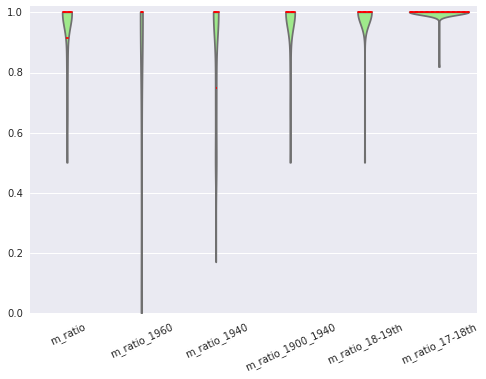

In [25]:
import seaborn as sns
g=sns.violinplot(data=df_m_w2,cut=0,trim=True,inner="quartile",
                 palette=[sns.xkcd_rgb["light green"]])
plt.xticks(rotation=25)
plt.ylim(0,1.02)
plt.show()

In [26]:
print df_m_w.men_1960.sum(),df_m_w.women_1960.sum(),df_m_w.all_men.sum()-df_m_w.men_1960.sum(),\
df_m_w.all_women.sum()-df_m_w.women_1960.sum()

144.0 83.0 2122.0 234.0


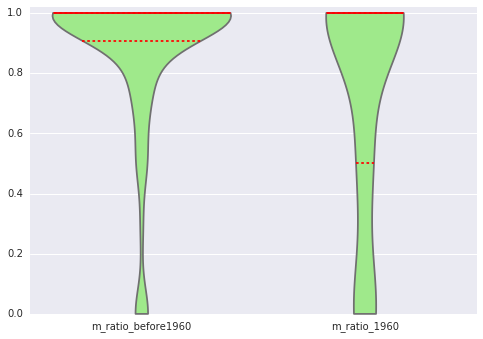

In [27]:
import seaborn as sns 
df_m_w["m_ratio_before1960"]=df_m_w.apply(lambda x: (float(x.all_men)-float(x.men_1960))/\
                                          float(x.all_men-x.men_1960+x.all_women-x.women_1960) \
                                    if float(x.all_men-x.men_1960+x.all_women-x.women_1960)>0 else None, axis = 1)
g=sns.violinplot(data=df_m_w[["m_ratio_before1960","m_ratio_1960"]],cut=0,trim=True,inner="quartile",
                 palette=[sns.xkcd_rgb["light green"]])
plt.ylim(0,1.02)
plt.show()

std_2=df_m_w["m_ratio_before1960"].std()*2
mean_m=df_m_w["m_ratio_before1960"].mean()
df2=df_m_w[ abs(df_m_w["m_ratio_before1960"] - mean_m)<std_2]["m_ratio_before1960"]
df_m_w2=pd.concat([df_m_w2,df2],axis=1)



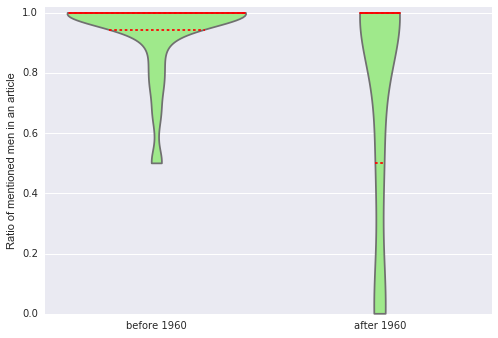

In [28]:
g=sns.violinplot(data=df_m_w2[["m_ratio_before1960","m_ratio_1960"]],cut=0,trim=True,inner="quartile",
                 palette=[sns.xkcd_rgb["light green"]])
plt.ylim(0,1.02)
plt.ylabel("Ratio of mentioned men in an article")
#plt.xlabel("")
plt.xticks([0,1],["before 1960","after 1960"])
#plt.savefig("de/plots/violin_1960.png",dpi=500, bbox_inches='tight')
plt.show()

In [96]:
df_m_w2.m_ratio_1960.median()

1.0

In [48]:
df_w3=df_m_w2[~df_m_w2.m_ratio_1960.isnull()]#73
print 100*float(len(df_w3[df_w3.m_ratio_1960>0.5]))/len(df_w3)#52
print 100*float(len(df_w3[df_w3.m_ratio_1960==0.5]))/len(df_w3)#5
print 100*float(len(df_w3[df_w3.m_ratio_1960<0.5]))/len(df_w3)#16

71.2328767123
6.84931506849
21.9178082192


In [77]:
df_m_w.loc[list(df_w3[df_w3.m_ratio_1960==0.5].index),["men_1960","women_1960"]]

,men_1960,women_1960
Buchhändler,2,2
Butler,1,1
Dompteur,1,1
Kameramann,2,2
Videojournalist,1,1


In [76]:
df_m_w.loc[list(df_w3[df_w3.m_ratio_1960<0.5].index),["men_1960","women_1960"]]

,men_1960,women_1960
Botin,0,1
Chefredakteur,0,1
Datenschutzbeauftragter,0,1
Diakon,0,1
Diener,0,1
Dirigent,0,2
Hilfspolizei,0,1
Journalist,2,3
Kürschner,0,1
Mediaberater,0,1


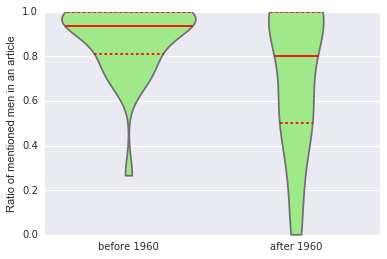

66.6666666667
15.1515151515
18.1818181818


In [85]:
#use only professions with at least 2 mentioned persons
df_new=df_m_w[df_m_w.men_1960+df_m_w.women_1960>1]
g=sns.violinplot(data=df_new[["m_ratio_before1960","m_ratio_1960"]],cut=0,trim=True,inner="quartile",
                 palette=[sns.xkcd_rgb["light green"]])
plt.ylabel("Ratio of mentioned men in an article")
#plt.xlabel("")
plt.xticks([0,1],["before 1960","after 1960"])
plt.show()
print 100*float(len(df_new[df_new.m_ratio_1960>0.5]))/len(df_new)#n=22
print 100*float(len(df_new[df_new.m_ratio_1960==0.5]))/len(df_new)#n=5
print 100*float(len(df_new[df_new.m_ratio_1960<0.5]))/len(df_new)#n=6

In [94]:
df_new[df_new.m_ratio_1960<0.5]

,all_men,men_-17th,men_17-18th,men_18-19th,men_1900_1940,men_1940,men_1960,all_women,women_-17th,women_17-18th,...,women_1960,m_ratio,m_ratio_1960,m_ratio_1940,m_ratio_1900_1940,m_ratio_18-19th,m_ratio_17-18th,m_ratio_-17th,m_ratio_before1960,m_ratio_before1940
Dirigent,5,4,0,1,0,0,0,3,0,0,...,2,0.625000,0.000000,0.000000,NaN,0.5,NaN,1.00,0.833333,0.833333
Journalist,20,2,1,2,5,10,2,12,0,0,...,3,0.625000,0.400000,0.526316,0.625000,1.0,1,1.00,0.666667,0.769231
Model,18,2,0,2,3,11,9,61,0,0,...,36,0.227848,0.200000,0.169231,0.300000,1.0,NaN,1.00,0.264706,0.500000
Rabbiner,10,3,1,2,2,2,1,9,1,0,...,5,0.526316,0.166667,0.222222,0.666667,1.0,1,0.75,0.692308,0.800000
Stuntman,11,0,0,4,4,3,1,2,0,0,...,2,0.846154,0.333333,0.600000,1.000000,1.0,NaN,NaN,1.000000,1.000000
Tätowierer,14,1,0,1,8,4,0,6,0,0,...,3,0.700000,0.000000,0.444444,0.888889,1.0,NaN,1.00,0.823529,0.909091


In [97]:
#chech whether distributions are significantly different
from scipy import stats  

m_before1960=df_m_w["m_ratio_before1960"].values
m_after1960=df_m_w["m_ratio_1960"].values

z_stat, p_val = stats.ranksums(m_before1960, m_after1960)   
print "MWW RankSum P for before and after 1960 distributions =", p_val , "z_stat=",z_stat
stats.mannwhitneyu(m_before1960, m_after1960)   

MWW RankSum P for before and after 1960 distributions = 6.90110150336e-37 z_stat= -12.6879004586


MannwhitneyuResult(statistic=11269.0, pvalue=1.2560467958190435e-39)

In [99]:
from scipy import stats  
z_stat, p_val = stats.ranksums(df_m_w.m_ratio.values, m_after1960)   
print "MWW RankSum P for before and after 1960 distributions =", p_val , "z_stat=",z_stat
stats.mannwhitneyu(df_m_w.m_ratio.values, m_after1960) 

MWW RankSum P for before and after 1960 distributions = 3.45413615653e-40 z_stat= -13.2700362508


MannwhitneyuResult(statistic=10306.0, pvalue=5.4289963993534552e-43)

In [30]:
print df_m_w.men_1940.sum(),df_m_w.women_1940.sum(),df_m_w.all_men.sum()-df_m_w.men_1940.sum(),\
df_m_w.all_women.sum()-df_m_w.women_1940.sum()
#print df_m_w.m_ratio_1940

512.0 177.0 1754.0 140.0


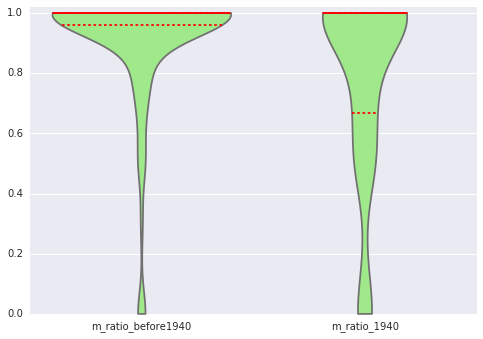

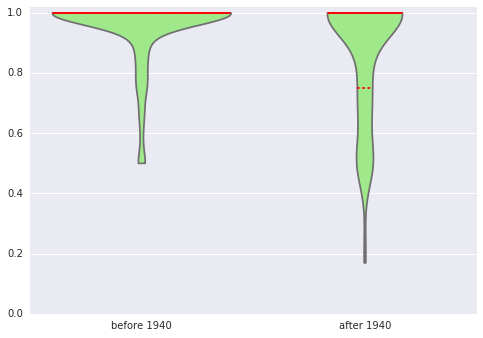

In [31]:
df_m_w["m_ratio_before1940"]=df_m_w.apply(lambda x: (float(x.all_men)-float(x.men_1940))/\
                                          float(x.all_men-x.men_1940+x.all_women-x.women_1940) \
                                    if float(x.all_men-x.men_1940+x.all_women-x.women_1940)>0 else None, axis = 1)
g=sns.violinplot(data=df_m_w[["m_ratio_before1940","m_ratio_1940"]],cut=0,trim=True,inner="quartile",
                 palette=[sns.xkcd_rgb["light green"]])
plt.ylim(0,1.02)
plt.show()

std_2=df_m_w["m_ratio_before1940"].std()*2
mean_m=df_m_w["m_ratio_before1940"].mean()
df2=df_m_w[ abs(df_m_w["m_ratio_before1940"] - mean_m)<std_2]["m_ratio_before1940"]
df_m_w2=pd.concat([df_m_w2,df2],axis=1)

g=sns.violinplot(data=df_m_w2[["m_ratio_before1940","m_ratio_1940"]],cut=0,trim=True,inner="quartile",
                 palette=[sns.xkcd_rgb["light green"]])
plt.ylim(0,1.02)
plt.xticks([0,1],["before 1940","after 1940"])
plt.show()

In [32]:
result_df = pd.concat([df_m_w, df], axis=1, join_axes=[df_m_w.index])

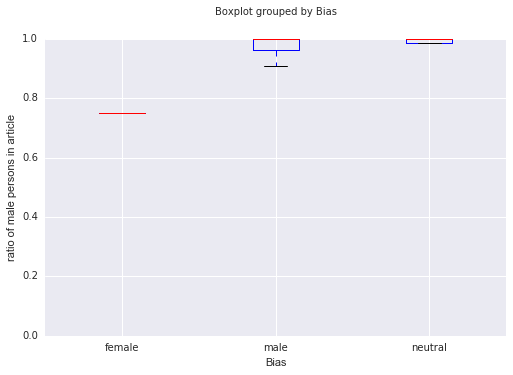

In [33]:
g=result_df.boxplot(by='Bias',column="m_ratio_before1940", return_type="axes")
plt.ylabel("ratio of male persons in article")
plt.title("")
plt.show()
#plt.xticks(range(1,4),["female\nn=2","male\nn=234","neutral\nn=21"])

In [34]:
print result_df.groupby("Bias").size()
result_df[result_df.Bias=="female"][["m_ratio","all_men","all_women","men_1940","women_1940",
                                     "m_ratio_1940","m_ratio_1960","m_ratio_before1940"]]

Bias
female       2
male       231
neutral     21
dtype: int64


,m_ratio,all_men,all_women,men_1940,women_1940,m_ratio_1940,m_ratio_1960,m_ratio_before1940
Gleichstellungsbeauftragte,0.000000,0,1,0,1,0,NaN,NaN
Hebamme,0.785714,11,3,2,0,1,1,0.75


In [127]:
print len(result_df[(result_df.Bias=="female")&(~ result_df.m_ratio_1940.isnull())])
print len(result_df[(result_df.Bias=="neutral")&(~ result_df.m_ratio_1940.isnull())])
print len(result_df[(result_df.Bias=="male")&(~ result_df.m_ratio_1940.isnull())])
result_df[(result_df.Bias=="neutral")&(~ result_df.m_ratio_1940.isnull())][["m_ratio","all_men","all_women","men_1940","women_1940",
                                     "m_ratio_1940","m_ratio_1960","m_ratio_before1940"]]

2
13
127


,m_ratio,all_men,all_women,men_1940,women_1940,m_ratio_1940,m_ratio_1960,m_ratio_before1940
Apotheker,0.952381,20,1,1,0,1.000000,NaN,0.950000
Bote,1.000000,1,0,1,0,1.000000,NaN,NaN
Botin,0.500000,1,1,0,1,0.000000,0.00,1.000000
Bundeskanzlerin,0.000000,0,3,0,3,0.000000,NaN,NaN
Diakon,0.833333,5,1,1,1,0.500000,0.00,1.000000
Diakonin,0.818182,9,2,2,0,1.000000,NaN,0.777778
Fachkraft für Automatenservice,0.500000,1,1,1,1,0.500000,1.00,NaN
Filmgeschäftsführung,1.000000,1,0,1,0,1.000000,NaN,NaN
Hilfspolizei,0.888889,8,1,4,1,0.800000,0.00,1.000000
Hostess,0.500000,1,1,1,1,0.500000,NaN,NaN


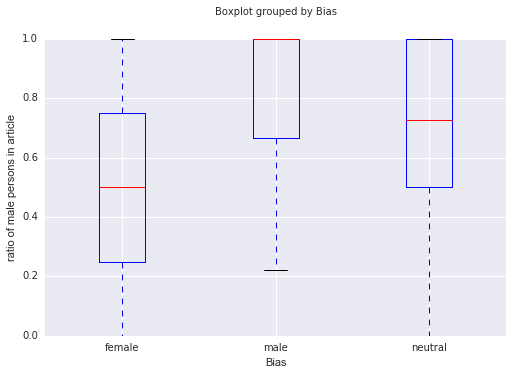

In [118]:
g=result_df.boxplot(by='Bias',column="m_ratio_1940", return_type="axes")
plt.ylabel("ratio of male persons in article")
plt.title("")
plt.show()

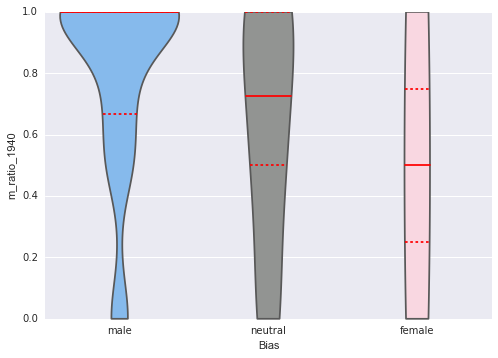

In [119]:
g=sns.violinplot(data=result_df,y="m_ratio_1940",x="Bias",cut=0,trim=True,inner="quartile",order=["male","neutral","female"],
                 palette=[sns.xkcd_rgb["sky blue"], sns.xkcd_rgb["grey"],sns.xkcd_rgb["light pink"]])

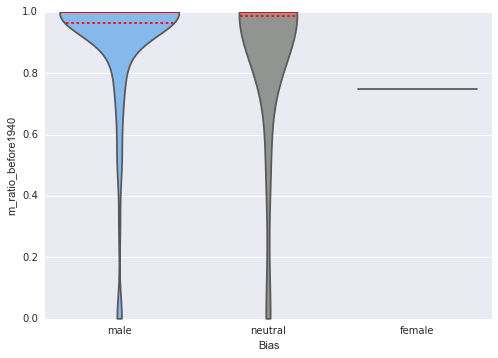

In [128]:
g=sns.violinplot(data=result_df,y="m_ratio_before1940",x="Bias",cut=0,trim=True,inner="quartile",order=["male","neutral","female"],
                 palette=[sns.xkcd_rgb["sky blue"], sns.xkcd_rgb["grey"],sns.xkcd_rgb["light pink"]])

(0, 1.02)

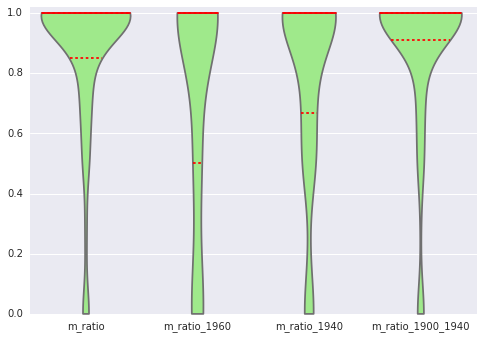

In [129]:
g=sns.violinplot(data=df_m_w[["m_ratio","m_ratio_1960","m_ratio_1940","m_ratio_1900_1940"]],cut=0,trim=True,inner="quartile",
                 palette=[sns.xkcd_rgb["light green"]])
plt.ylim(0,1.02)

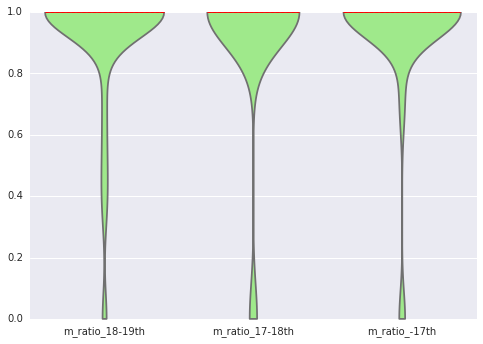

In [130]:
g=sns.violinplot(data=df_m_w[["m_ratio_18-19th","m_ratio_17-18th","m_ratio_-17th"]],cut=0,trim=True,inner="quartile",
                 palette=[sns.xkcd_rgb["light green"]])

# Correlation between numbers mentioned people and labor market statistics

C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


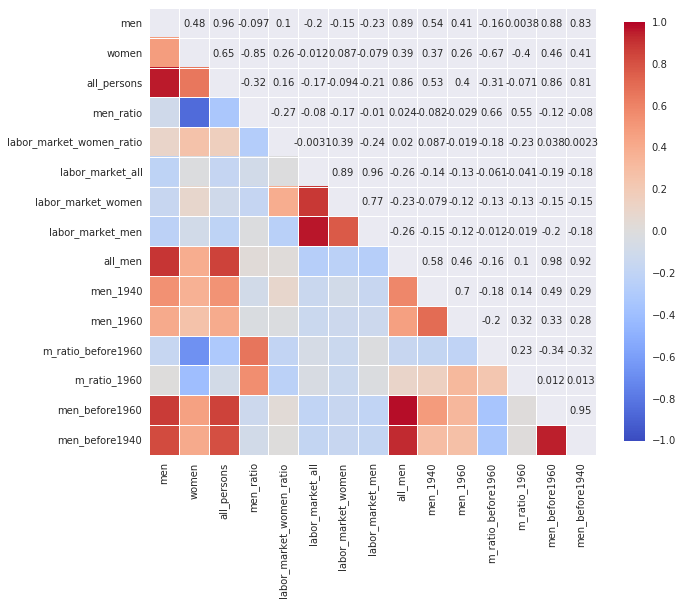

In [123]:

df_copy=pd.read_csv('de/all_persons_and_labor_market.csv', sep='\t',index_col=0,encoding='utf-8')

df_copy=pd.concat([df_copy,df_m_w[["all_men","men_1940","men_1960","m_ratio_before1960","m_ratio_1960"]]],axis=1)
df_copy["men_before1960"]=df_copy.apply(lambda x: float(x["all_men"])-float(x["men_1960"]) if float(x["all_men"])>0 else None, axis = 1)
df_copy["men_before1940"]=df_copy.apply(lambda x: float(x["all_men"])-float(x["men_1940"]) if float(x["all_men"])>0 else None, axis = 1)

#df_copy.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(10, 10))
sns.corrplot(df_copy,method="spearman",diag_names=False)

In [124]:
from scipy.stats import spearmanr
df_copy=df_copy[["men","women","all_persons","men_ratio","labor_market_women_ratio",
                 "labor_market_all","labor_market_women","labor_market_men","all_men",
                 "men_1940","men_1960","men_before1960","men_before1940","m_ratio_before1960","m_ratio_1960"]]
#construct two arrays, one of the correlation and the other of the p-vals
rho = df_copy.corr(method='spearman')
pval = np.zeros([df_copy.shape[1],df_copy.shape[1]])
pval2=np.zeros([df_copy.shape[1],df_copy.shape[1]])
spr=np.zeros([df_copy.shape[1],df_copy.shape[1]])
for i in range(df_copy.shape[1]): # rows are the number of rows in the matrix.
    for j in range(df_copy.shape[1]):
        JonI        = pd.ols(y=df_copy.icol(i), x=df_copy.icol(j), intercept=True)
        pval[i,j]  = JonI.f_stat['p-value']
        a=df_copy[~((df_copy.icol(i).isnull())|(df_copy.icol(j).isnull()))]
        pval2[i,j]= spearmanr(a.icol(i),a.icol(j))[1]
        spr[i,j]= spearmanr(a.icol(i),a.icol(j))[0]

rho

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]


,men,women,all_persons,men_ratio,labor_market_women_ratio,labor_market_all,labor_market_women,labor_market_men,all_men,men_1940,men_1960,men_before1960,men_before1940,m_ratio_before1960,m_ratio_1960
men,1.000000,0.478654,0.960924,-0.097164,0.104775,-0.204663,-0.149762,-0.226497,0.891249,0.536587,0.413249,0.877298,0.826714,-0.161293,0.003774
women,0.478654,1.000000,0.652638,-0.854905,0.262048,-0.012283,0.087044,-0.079090,0.393198,0.368770,0.258299,0.459909,0.410242,-0.668435,-0.396500
all_persons,0.960924,0.652638,1.000000,-0.322694,0.164052,-0.166609,-0.094258,-0.205084,0.855821,0.525790,0.404626,0.857064,0.805237,-0.308602,-0.071326
men_ratio,-0.097164,-0.854905,-0.322694,1.000000,-0.271342,-0.079568,-0.170079,-0.010439,0.024116,-0.081584,-0.029477,-0.119769,-0.079768,0.663679,0.551632
labor_market_women_ratio,0.104775,0.262048,0.164052,-0.271342,1.000000,-0.003129,0.391813,-0.238664,0.019924,0.087003,-0.018906,0.037543,0.002325,-0.181602,-0.231789
labor_market_all,-0.204663,-0.012283,-0.166609,-0.079568,-0.003129,1.000000,0.889263,0.961240,-0.262282,-0.135478,-0.126892,-0.190656,-0.176845,-0.060547,-0.040972
labor_market_women,-0.149762,0.087044,-0.094258,-0.170079,0.391813,0.889263,1.000000,0.767696,-0.228731,-0.079496,-0.118199,-0.150917,-0.152046,-0.130239,-0.131264
labor_market_men,-0.226497,-0.079090,-0.205084,-0.010439,-0.238664,0.961240,0.767696,1.000000,-0.261784,-0.151637,-0.122913,-0.195084,-0.175817,-0.012266,-0.019308
all_men,0.891249,0.393198,0.855821,0.024116,0.019924,-0.262282,-0.228731,-0.261784,1.000000,0.579572,0.461195,0.981266,0.922457,-0.155039,0.103083
men_1940,0.536587,0.368770,0.525790,-0.081584,0.087003,-0.135478,-0.079496,-0.151637,0.579572,1.000000,0.696461,0.488580,0.293328,-0.175881,0.144509


In [125]:
names=["men","women","all_persons","men_ratio","labor_market_women_ratio","labor_market_all",
    "labor_market_women","labor_market_men","all_men","men_1940","men_1960","men_before1960","men_before1940",
       "m_ratio_before1960","m_ratio_1960"]
pd.DataFrame(pval2,index=names,columns=names)

,men,women,all_persons,men_ratio,labor_market_women_ratio,labor_market_all,labor_market_women,labor_market_men,all_men,men_1940,men_1960,men_before1960,men_before1940,m_ratio_before1960,m_ratio_1960
men,0.000000e+00,6.343011e-25,2.936477e-230,4.901379e-02,3.527115e-02,3.399790e-05,2.545499e-03,4.258911e-06,1.626780e-88,2.427985e-20,6.751464e-12,1.794179e-78,7.002763e-62,1.096230e-02,9.747204e-01
women,6.343011e-25,0.000000e+00,3.069111e-51,1.238928e-118,9.068749e-08,8.055786e-01,8.055864e-02,1.124560e-01,8.069611e-11,1.333717e-09,3.083168e-05,4.543548e-14,3.061940e-11,1.789676e-33,5.151891e-04
all_persons,2.936477e-230,3.069111e-51,0.000000e+00,2.052580e-11,9.341434e-04,7.739650e-04,5.837129e-02,3.272947e-05,4.216856e-74,1.854747e-19,2.002574e-11,4.506047e-71,2.135382e-56,7.165122e-07,5.487360e-01
men_ratio,4.901379e-02,1.238928e-118,2.052580e-11,0.000000e+00,3.002182e-08,1.102918e-01,5.969521e-04,8.343177e-01,7.020882e-01,1.949811e-01,6.400907e-01,6.285362e-02,2.162930e-01,7.314560e-33,4.231225e-07
labor_market_women_ratio,3.527115e-02,9.068749e-08,9.341434e-04,3.002182e-08,0.000000e+00,9.500147e-01,2.831158e-16,1.219070e-06,7.539206e-01,1.702654e-01,7.661192e-01,5.643828e-01,9.715418e-01,4.429373e-03,5.351382e-02
labor_market_all,3.399790e-05,8.055786e-01,7.739650e-04,1.102918e-01,9.500147e-01,0.000000e+00,1.223571e-138,4.801370e-227,2.668823e-05,3.225456e-02,4.502717e-02,3.147496e-03,6.229245e-03,3.463064e-01,7.362930e-01
labor_market_women,2.545499e-03,8.055864e-02,5.837129e-02,5.969521e-04,2.831158e-16,1.223571e-138,0.000000e+00,1.046999e-79,2.654258e-04,2.103407e-01,6.203224e-02,1.984125e-02,1.892680e-02,4.209096e-02,2.787403e-01
labor_market_men,4.258911e-06,1.124560e-01,3.272947e-05,8.343177e-01,1.219070e-06,4.801370e-227,1.046999e-79,0.000000e+00,2.768041e-05,1.641876e-02,5.225105e-02,2.503944e-03,6.541945e-03,8.488240e-01,8.739476e-01
all_men,1.626780e-88,8.069611e-11,4.216856e-74,7.020882e-01,7.539206e-01,2.668823e-05,2.654258e-04,2.768041e-05,0.000000e+00,3.431943e-24,8.799232e-15,1.173051e-173,3.579205e-101,1.452453e-02,3.854724e-01
men_1940,2.427985e-20,1.333717e-09,1.854747e-19,1.949811e-01,1.702654e-01,3.225456e-02,2.103407e-01,1.641876e-02,3.431943e-24,0.000000e+00,3.448833e-38,6.351203e-16,3.450553e-06,5.478476e-03,2.225458e-01
